In [4]:
%matplotlib inline

import pickle
import numpy as np
from sklearn import preprocessing
import pickle
import pywt
import matplotlib.pyplot as plt

import model_fit_history as mfh

In [51]:
X_train,y_train,pvals,keys,time = mfh.load_data('transit_data_train.pkl',whiten=True)

155520
155520


[1.5 2.5 3.5 4.5]
1.0
rp 0.01414213562373095
per 2.0
inc 86.0
sig_tol 1.5
phi 0.0
A 0.00025
w 0.5
PA -1.0
Pw 1.0


1.0
rp 0.1
per 4.0
inc 90.0
sig_tol 1.5
phi 3.141592653589793
A 0.002
w 1.0
PA 100.0
Pw 100.0


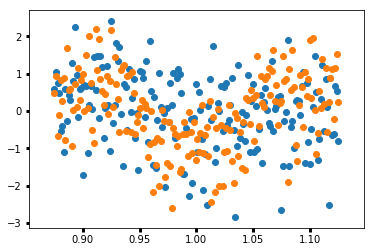

In [75]:
print(np.unique(pvals[:,3]))
ind = np.argwhere(pvals[:,3] == 1.5)

n = 10
plt.scatter(time, X_train[n,:])
print(y_train[n])
for i in range(len(keys)):
    print(keys[i], pvals[n, i])
    
print('\n')

n = ind[-1][0]
print(y_train[n])
plt.scatter(time, X_train[n,:])
for i in range(len(keys)):
    print(keys[i], pvals[n, i])

In [19]:
Xc_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
print(Xc_train.shape)

(311040, 180, 1)


In [26]:
print(y_train)

[1. 1. 1. ... 0. 0. 0.]


In [29]:
model = mfh.make_cnn(Xc_train.shape[1])
help(model)

Help on Sequential in module keras.models object:

class Sequential(keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  # Arguments
 |      layers: list of layers to add to the model.
 |  
 |  # Note
 |      The first layer passed to a Sequential model
 |      should have a defined input shape. What that
 |      means is that it should have received an `input_shape`
 |      or `batch_input_shape` argument,
 |      or for some type of layers (recurrent, Dense...)
 |      an `input_dim` argument.
 |  
 |  # Example
 |  
 |      ```python
 |          model = Sequential()
 |          # first layer must have a defined input shape
 |          model.add(Dense(32, input_dim=500))
 |          # afterwards, Keras does automatic shape inference
 |          model.add(Dense(32))
 |  
 |          # also possible (equivalent to the above):
 |          model = Sequential()
 |          model.add(Dense(32, input_shape=(500,)))
 |          model.add(Dense(32))
 |  
 |          # also possib

/usr/local/lib/python3.6/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as PRELU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/Users/bjackson/research/Exoplanet-Artificial-Intelligence/model_fit_history.py:152: UserWarning: Update your `AveragePooling1D` call to the Keras 2 API: `AveragePooling1D(pool_size=3)`
  model.add(AveragePooling1D(pool_length=pool_length))


In [71]:
arr = lambda x : np.array( list(x),dtype=np.float )
data = pickle.load(open('pickle_data/transit_data_train.pkl','rb'))
pvals = arr(data['results'][:,0])
transits = arr(data['results'][:,1])
null = arr(data['results'][:,2])

In [74]:
print(pvals[0,:])
print(null.shape)

[ 1.41421356e-02  2.00000000e+00  8.60000000e+01  1.50000000e+00
  0.00000000e+00  2.50000000e-04  2.50000000e-01 -1.00000000e+00
 -3.00000000e+00]
(155520, 180)
